In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# About a dataset

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [115]:
df.rename(columns={'longitude': 'distance_west', 'latitude': 'distance_north'}, inplace=True)
df.head()

,distance_west,distance_north,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   distance_west       20640 non-null  float64
 1   distance_north      20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [117]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   distance_west       20433 non-null  float64
 1   distance_north      20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [118]:
from sklearn.model_selection import train_test_split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
train_df=pd.concat([X_train, y_train], axis=1)
train_df.head()


,distance_west,distance_north,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


array([[<Axes: title={'center': 'distance_west'}>,
        <Axes: title={'center': 'distance_north'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

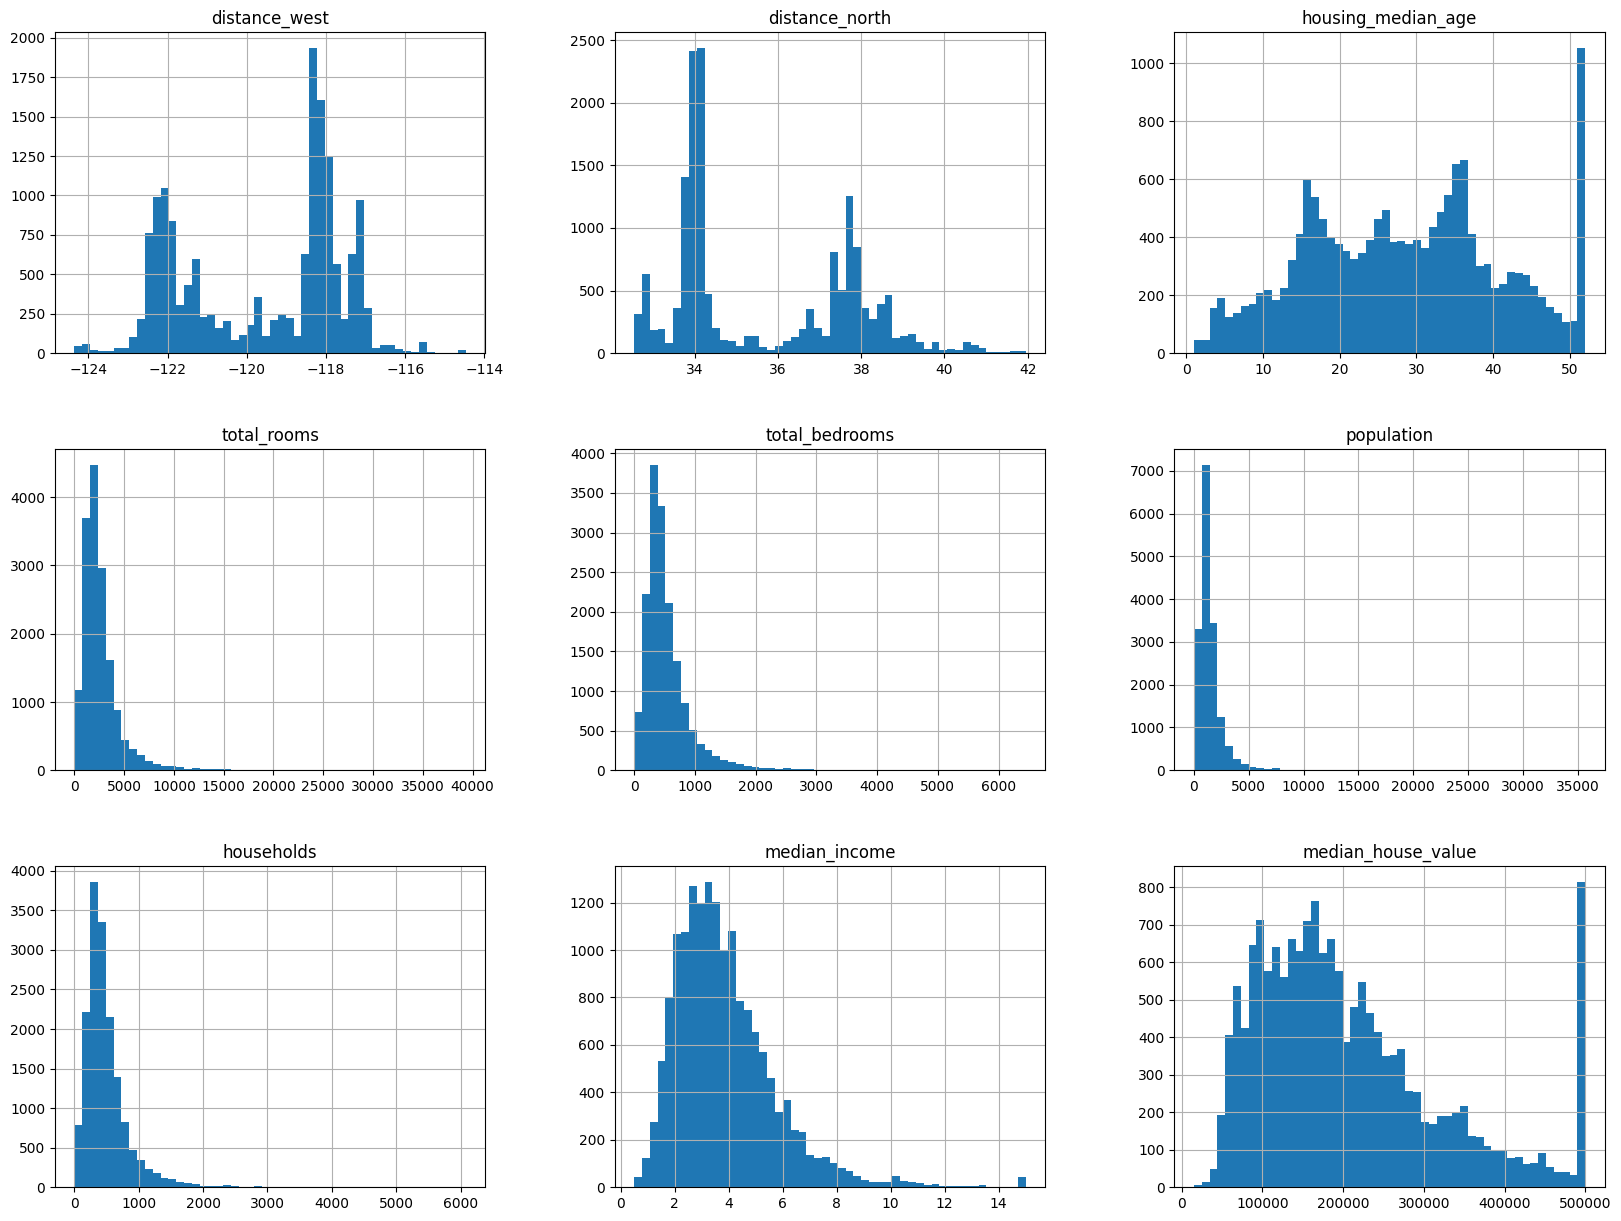

In [121]:
train_df.hist(bins=50, figsize=(20,15))

<Axes: >

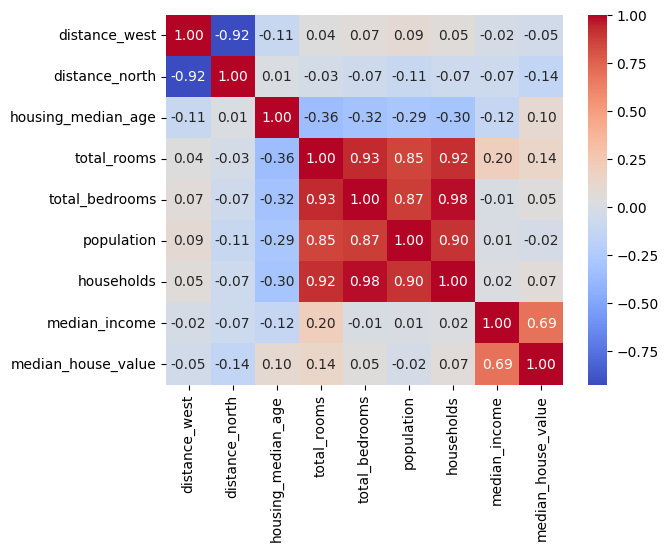

In [122]:
sns.heatmap(train_df.drop('ocean_proximity',axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')

# Data Preprocessing


In [123]:
df.columns

Index(['distance_west', 'distance_north', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

array([[<Axes: title={'center': 'distance_west'}>,
        <Axes: title={'center': 'distance_north'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

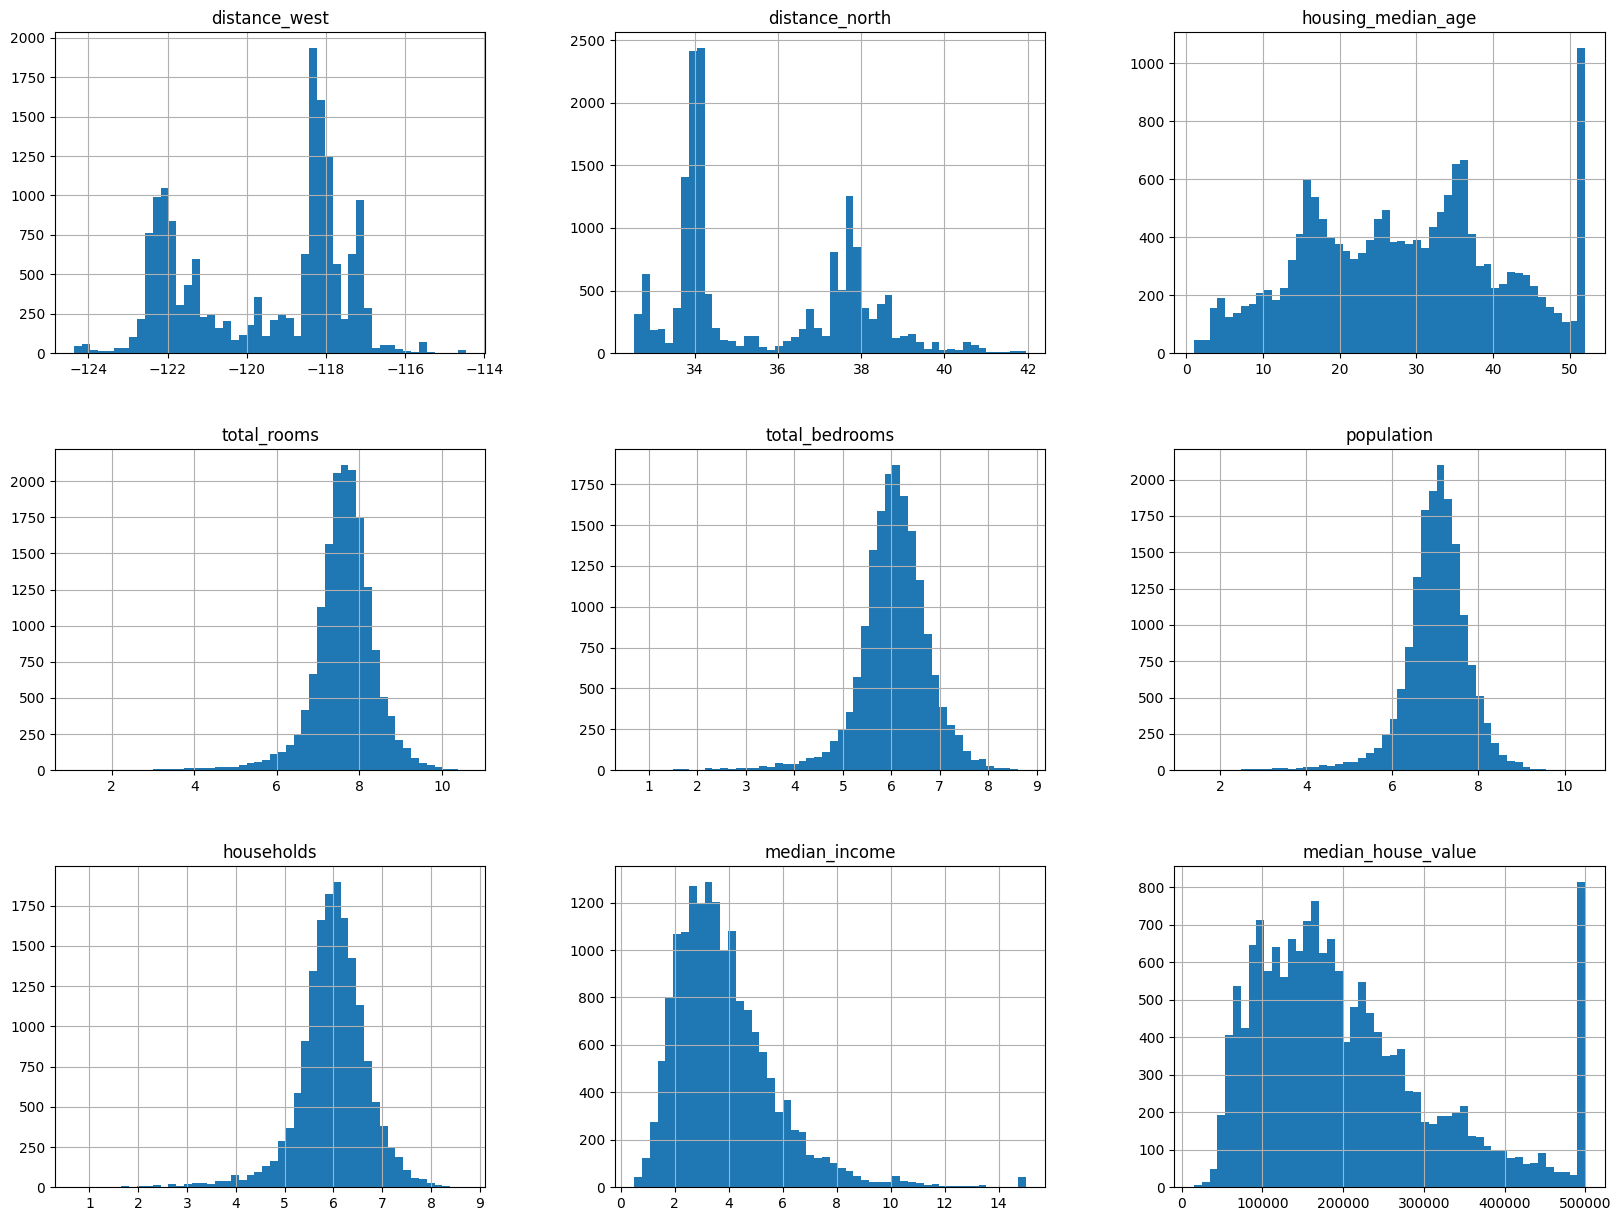

In [124]:
train_df['total_rooms']=np.log(train_df['total_rooms'] + 1)
train_df['total_bedrooms']=np.log(train_df['total_bedrooms'] + 1)
train_df['population']=np.log(train_df['population'] + 1)
train_df['households']=np.log(train_df['households'] + 1)

train_df.hist(bins=50, figsize=(20,15))

In [125]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [126]:
train_df['ocean_proximity1'] = train_df['ocean_proximity'].map({'<1H OCEAN':4, 'INLAND':3, 'NEAR OCEAN':2, 'NEAR BAY':1, 'ISLAND':0})

In [127]:
train_df

,distance_west,distance_north,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,ocean_proximity1
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,<1H OCEAN,227600.0,4
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,INLAND,110400.0,3
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,INLAND,248100.0,3
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,<1H OCEAN,305600.0,4
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,NEAR OCEAN,214600.0,2
...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,8.003697,6.216606,7.271009,6.118097,5.4286,<1H OCEAN,273400.0,4
12081,-117.54,33.76,5.0,8.673684,6.943122,8.089176,6.909753,4.7965,<1H OCEAN,160800.0,4
5447,-118.42,34.01,42.0,7.374629,5.913503,6.859615,5.894403,3.0990,<1H OCEAN,335400.0,4
866,-122.04,37.57,12.0,8.651724,6.970730,8.142354,6.964136,5.2879,NEAR BAY,231200.0,1


<Axes: >

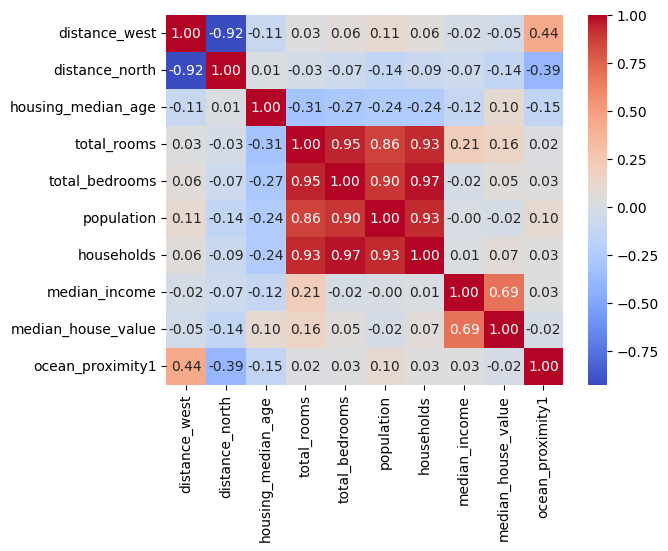

In [128]:
sns.heatmap(train_df.drop('ocean_proximity',axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm')

The scatterplot down here is similar to map of California, we can see the ocean on the left coast where the median house value is higher, and the inland areas are less expensive.

<Axes: xlabel='distance_west', ylabel='distance_north'>

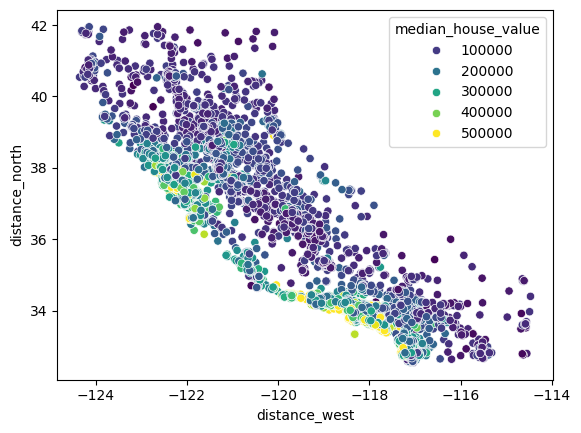

In [129]:
sns.scatterplot(x='distance_west', y='distance_north', hue='median_house_value', data=train_df, palette='viridis', hue_norm=(train_df['median_house_value'].min(), train_df['median_house_value'].max()))

# Linear Regression model

In [130]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
X_train, y_train = train_df.drop(['median_house_value', 'ocean_proximity'], axis=1), train_df['median_house_value']

lin.fit(X_train, y_train)

LinearRegression()

In [132]:
test_df = X_test.join(y_test)

test_df['total_rooms']=np.log(test_df['total_rooms'] + 1)
test_df['total_bedrooms']=np.log(test_df['total_bedrooms'] + 1)
test_df['population']=np.log(test_df['population'] + 1)
test_df['households']=np.log(test_df['households'] + 1)
test_df['ocean_proximity1'] = test_df['ocean_proximity'].map({'<1H OCEAN':4, 'INLAND':3, 'NEAR OCEAN':2, 'NEAR BAY':1, 'ISLAND':0})
test_df = test_df.drop('ocean_proximity', axis=1)

X_test, y_test = test_df.drop(['median_house_value', ], axis=1), test_df['median_house_value']

In [133]:
X_test, y_test = test_df.drop(['median_house_value', ], axis=1), test_df['median_house_value']

In [134]:
lin.score(X_test, y_test)

0.6628448886385678